<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/teoriepruzkumu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teorie průzkumu

## Úvaha

Představte si, že máte prostor rozdělený na dvě části. Zvolíte si jednu část, kterou zkontrolujete. Protivník si taktéž zvolí část, kde bude přítomen. V případě, kdy zvolíte stejný prostor, vyhráváte, v opačném případě prohráváte.

Tento problém lze popsat pomocí maticové hry a vyřešit jako úlohu lineárního programování.

$$max\{v:A^Tx^B- \begin{pmatrix}v \\
v \\
\vdots \\
v
\end{pmatrix} \ge 0, \sum_{i=1}^nx_i^B=1,x^B \ge 0, v \in R\}$$

## Pravděpodobnost setkání

https://www.mathpages.com/home/kmath124/kmath124.htm

Mějme dvě náhodné proměnné s rovnoměrným rozdělením pravděpodobností na intervalu $<0;1>$. Jaká je pravděpodobnost, že jejich hodnoty jsou od sebe vzdálené maximálně $q$? 

$$P_2=2q-q^2$$





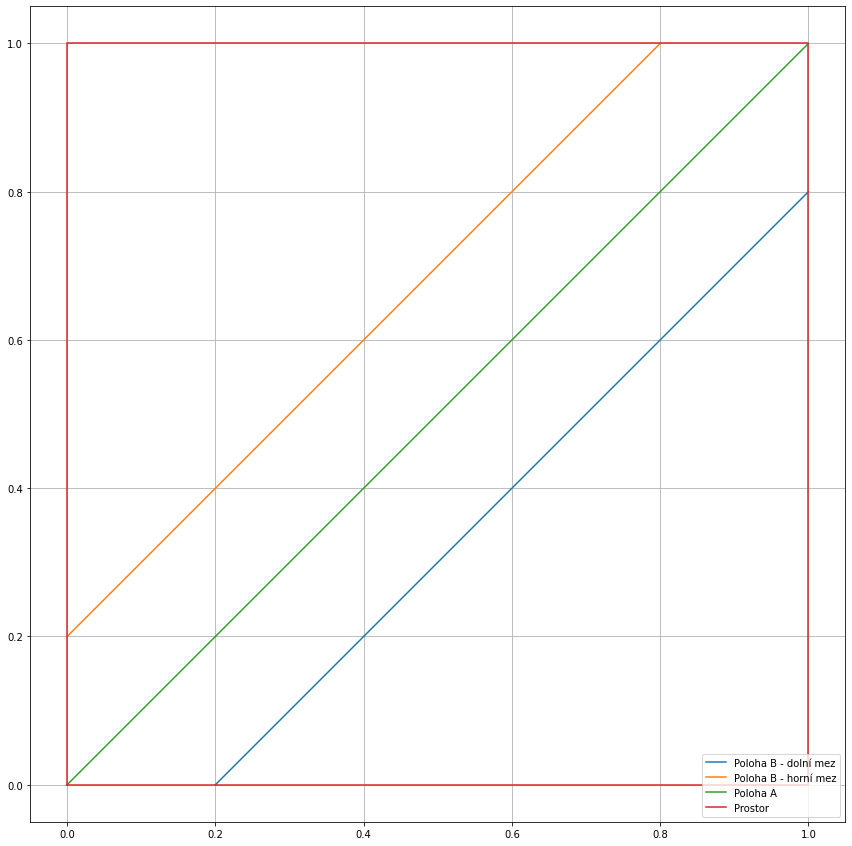

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 15)
                                  
def drawPicture(q):
  a = {'x': [q, 1], 'y': [0, 1 - q]}
  b = {'x': [0, 1 - q], 'y': [q, 1]}
  c = {'x': [0, 1], 'y': [0, 1]}
  d = {'x': [0, 1, 1, 0, 0], 'y': [0, 0, 1, 1, 0]}
  all = [a, b, c, d]
  for i in all:
    plt.plot(i['x'], i['y'])
  plt.legend(['Poloha B - dolní mez', 'Poloha B - horní mez', 'Poloha A', 'Prostor'], loc='lower right')
  plt.grid('both')
  plt.gca().set_aspect('equal')

drawPicture(0.2)

Úlohu o setkání lze řešit v čase. Jaká je pravděpodobnost setkání dvou lidí, jestliže na dané místo dorazí někdy v čase $<t;t+1[h]>$ a na místě setrvají právě $\Delta t [h]$. Čas lze zobrazit stejně jako v úloze výše a tedy výpočet je naprosto stejný.

Zobecněný vztah pro $n$ náhodných proměnných je

$$P_n=nq^{n-1}-(n-1)q^n$$

## Doplňkový studijní materiál

https://www.youtube.com/watch?v=YXLVjCKVP7U

https://www.youtube.com/watch?v=ce3kUWkY9IY

https://www.youtube.com/watch?v=3xAIWiTJCvE

https://stats.libretexts.org/Courses/Saint_Mary%27s_College_Notre_Dame/MATH_345__-_Probability_(Kuter)/4%3A_Continuous_Random_Variables/4.1%3A_Probability_Density_Functions_(PDFs)_and_Cumulative_Distribution_Functions_(CDFs)_for_Continuous_Random_Variables

## Simulační přístup

### Výpočet pravděpodobnosti pomocí simulace

$$P=\frac{\sum_{x \in X} f(x)}{\lVert {X} \rVert }$$

In [ ]:
def simProbability(count, func):
  sum = 0
  for i in range(count):
    if func():
      sum += 1
  return sum / count

Výpočet funkce kumulativní pravděpodobnosti

In [54]:
def simIt(experimentFunc):
  xx = []
  yy = []
  qq = []

  count = 100
  for i in range(count):
    x = i / count
    func = lambda : experimentFunc(x)
    probability = simProbability(10000, func)
    xx.append(x)
    yy.append(probability)
    qq.append(2 * x - x * x)
  
  plt.plot(xx, yy)
  plt.plot(xx, qq)
  plt.grid('both')
  plt.gca().set_aspect('equal')
  plt.title('Pravděpodobnost zjištění v závislosti na pozorovací vzdálenosti')
  plt.xlabel('Pozorovací vzdálenost')
  plt.ylabel('Pravděpodobnost')

 

Náhodný bod v rovině

In [41]:
import random
from math import sqrt

def randomPoint2D():
  return random.random(), random.random()

def randomPoint3D():
  return random.random(), random.random(), random.random()  

Je žádoucí si uvědomit, že z hlediska matematického popisu je stejné řešit úlohu v R a čase a úlohu v RxR.

In [ ]:
def distanceTest(a, b, distance):
  total = 0
  for ai, bi in zip(a, b):
    delta = ai - bi
    total = total + delta * delta
    
  return sqrt(total) < distance

Pozorování jedním pozorovatelem

In [42]:
def twoPointsIn(distance):
  a = randomPoint()
  b = randomPoint()
  return distanceTest(a, b, distance)

Pozorování dvěma pozorovateli

In [43]:
def threePointsIn(distance):
  a = randomPoint()
  b = randomPoint()
  c = randomPoint()
  deltaXb = a[0] - b[0]
  deltaYb = a[1] - b[1]
  deltaXc = a[0] - c[0]
  deltaYc = a[1] - c[1]
  distanceb = sqrt(deltaXb * deltaXb + deltaYb * deltaYb)
  distancec = sqrt(deltaXc * deltaXc + deltaYc * deltaYc)
  return  distanceb < distance or distancec < distance

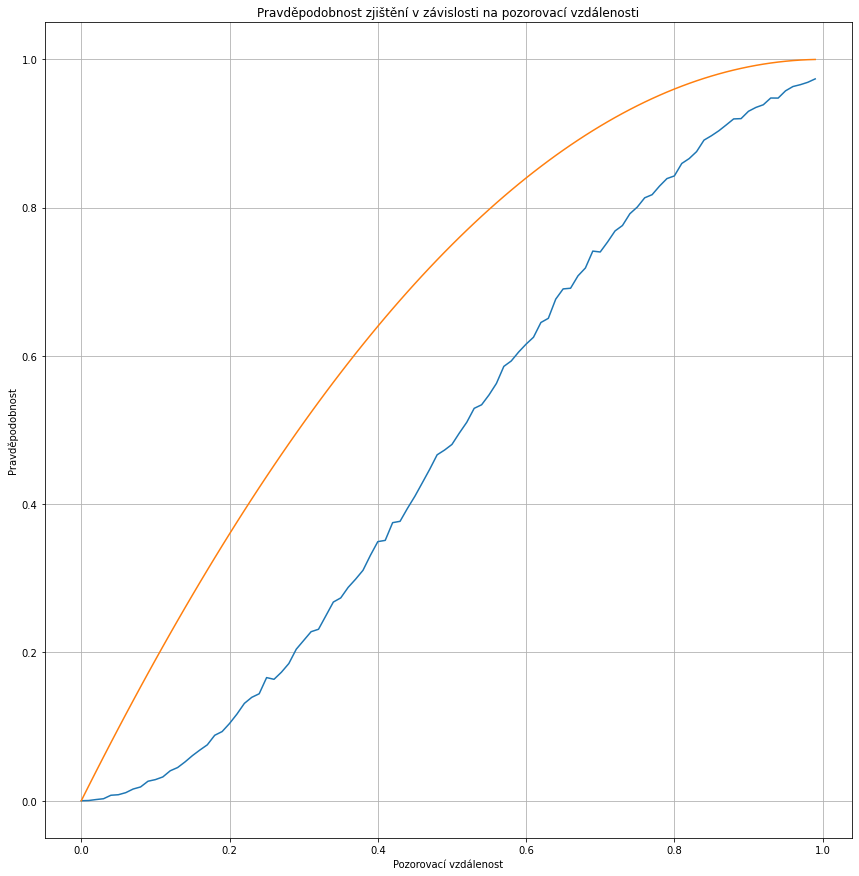

In [55]:
simIt(twoPointsIn) 

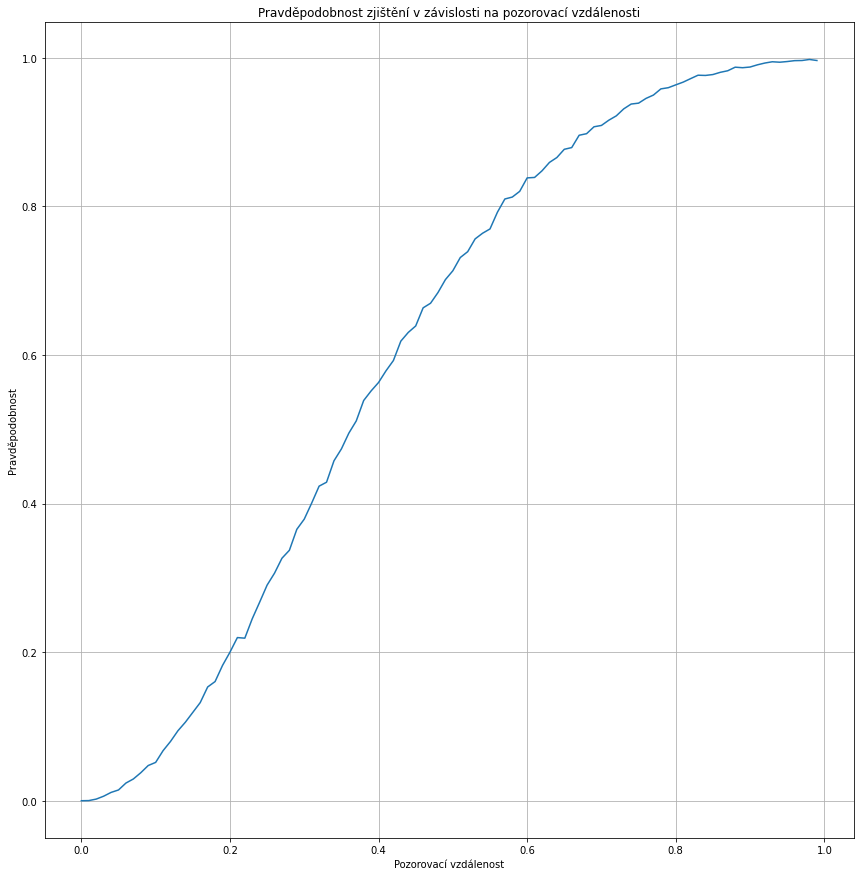

In [46]:
simIt(threePointsIn)

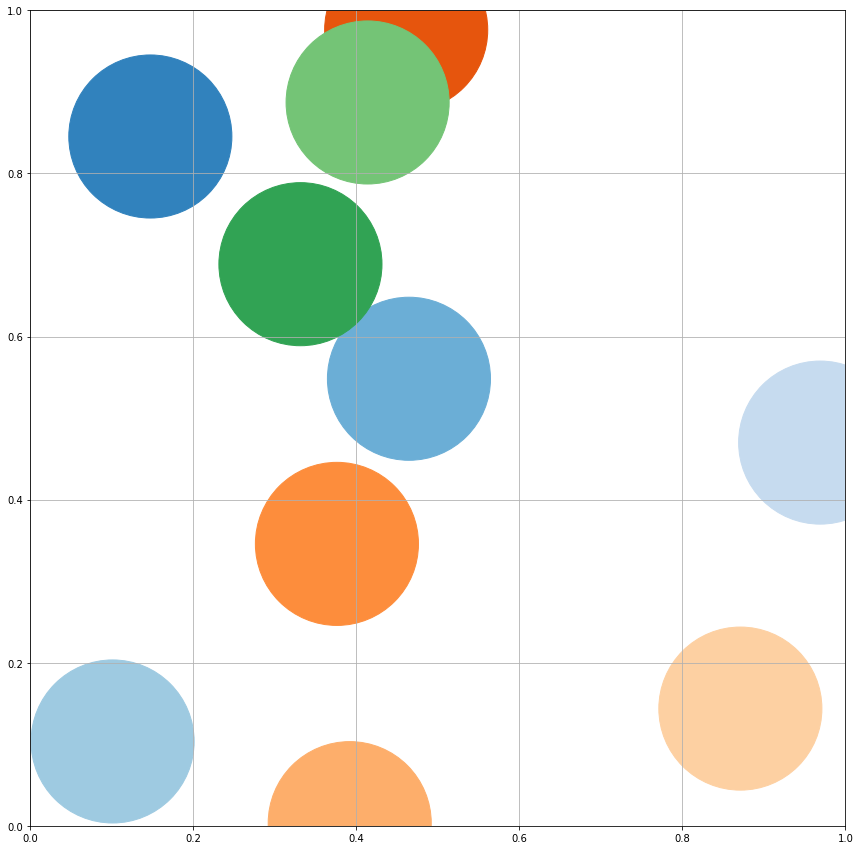

In [33]:
from cycler import cycler

def plotPoints(count, size):
  figure, axes = plt.subplots()

  colors = iter(cycler("color", plt.cm.tab20c.colors))
  for i in range(count):
    a = randomPoint()
    color = next(colors)
    draw_circle = plt.Circle(a, size, **color)
    axes.add_artist(draw_circle)

  axes.set_aspect(1)
  plt.grid('both')
  plt.show()

plotPoints(10, 0.1)  

In [ ]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3)

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()